# Project 5

### Import and explore the data.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV,train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,KFold
from sklearn.pipeline import Pipeline
from imblearn import over_sampling,under_sampling
from imblearn.over_sampling import SMOTE
from scipy.stats import f_oneway,ttest_ind
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_curve

In [2]:
df_sig = pd.read_csv('signal-data.csv')
df = pd.read_excel('Future_predictions.xlsx')

In [750]:
df_sig1 = pd.read_csv('signal-data.csv')

In [416]:
df_sig.head()
# While checking the dataframe's columns we notice a lot of NaN values

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [417]:
df_sig.dropna(axis=1)
# We try dropping the columns that have NaN and notice that only 54 columns are left, we cannot afford to lose 538 columns

,Time,20,86,87,88,113,114,115,116,117,...,527,570,571,572,573,574,575,576,577,Pass/Fail
0,2008-07-19 11:55:00,1.4026,2.3895,0.9690,1747.6049,0.9460,0.0,748.6115,0.9908,58.4306,...,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,-1
1,2008-07-19 12:32:00,1.3825,2.3754,0.9894,1931.6464,0.9425,0.0,731.2517,0.9902,58.6680,...,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,-1
2,2008-07-19 13:17:00,1.4123,2.4532,0.9880,1685.8514,0.9231,0.0,718.5777,0.9899,58.4808,...,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,1
3,2008-07-19 14:43:00,1.4011,2.4004,0.9904,1752.0968,0.9564,0.0,709.0867,0.9906,58.6635,...,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,-1
4,2008-07-19 15:22:00,1.3888,2.4530,0.9902,1828.3846,0.9424,0.0,796.5950,0.9908,58.3858,...,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,1.4072,2.3762,0.9861,1869.4215,0.9520,0.0,727.6761,0.9894,58.3514,...,2.6649,536.3418,2.0153,7.98,0.2363,2.6401,0.0785,1.4879,11.7256,-1
1563,2008-10-16 20:49:00,1.3949,2.4880,0.9911,1872.5133,0.9561,0.0,755.7527,0.9899,57.1020,...,6.0192,537.9264,2.1814,5.48,0.3891,1.9077,0.1213,1.0187,17.8379,-1
1564,2008-10-17 05:26:00,1.4256,2.4590,0.9869,1820.3629,0.9488,0.0,704.2686,0.9891,59.2046,...,5.4641,530.3709,2.3435,6.49,0.4154,2.1760,0.1352,1.2237,17.7267,-1
1565,2008-10-17 06:01:00,1.3868,2.3600,0.9796,1627.4714,0.9485,0.0,605.6190,0.9896,58.2686,...,6.5512,534.3936,1.9098,9.13,0.3669,3.2524,0.1040,1.7085,19.2104,-1


### Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

### We convert the target Pass from "-1" to "1" and Fail from "1" to "0" as the system can understand the binary categorical values better than normal binary values.

### Also the global way of treating  Pass is with 1 and fail is with 0

In [161]:
df_sig['Pass/Fail'].replace({1:0,-1:1},inplace=True)

In [162]:
df_sig

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,1


# 2. Data cleansing:
### • Missing value treatment.
#### We notice that 1567 rows of data, we will see the number of missing values in each column

In [163]:
Missing_values_percentage = []
Missing_value_count = []
for a,b in zip(df_sig.isnull().sum(),df_sig.columns):
    percentage = (a/df_sig[b].count())
    if a > 100:
        df_sig.drop(b,axis=1,inplace=True)
    else:
        pass 
    
# We notice that 52 columns have missing values that is greater than 100 NaN so we drop them using a function as filling
# these columns will lead to change in data distributions.

# we have 1567 rows of data, missing 100 rows is 6.3% of data and filling this 6.3% or more data will affect the 
# guassian distribution of original dataset.

In [164]:
df_sig

,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,1


## 1. Now we have only columns that has missing values of 51 count which is 3.2% or even lesser of missing data.

## 2. We can try filling these 3.2% missing values with the median data which will not affect the distribution.

## 3. We will try to apply this in a seperate column and check for distributions change, if there is not much change then we shall proceed



In [165]:
df_sig.isnull().sum().sort_values(ascending=False)

#Maximum missing values is only 51

496     51
89      51
90      51
362     51
363     51
        ..
255      0
291      0
359      0
360      0
Time     0
Length: 540, dtype: int64

<AxesSubplot:xlabel='496', ylabel='Density'>

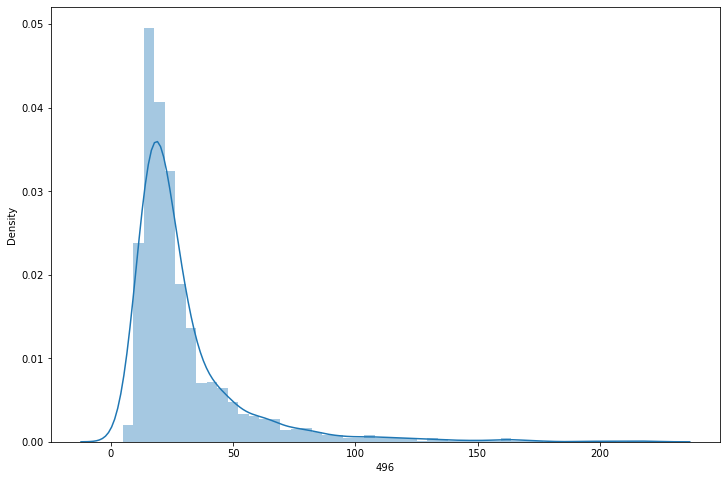

In [166]:
plt.figure(figsize=(12,8))
sns.distplot(df_sig['496'])

#Column before filling missing values

<AxesSubplot:xlabel='496', ylabel='Density'>

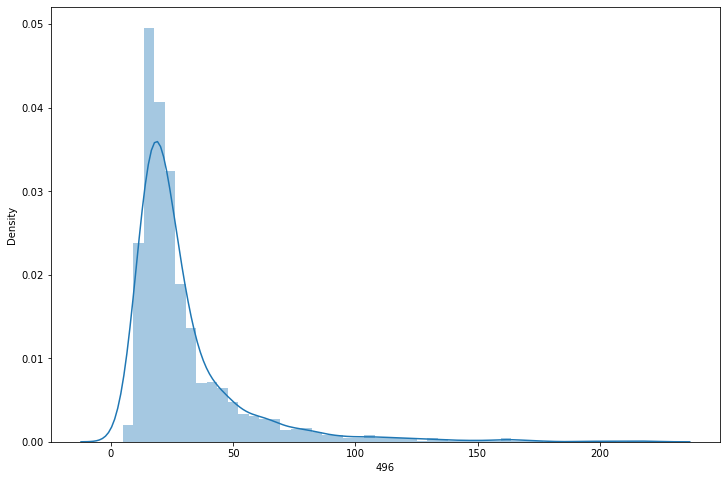

In [167]:
newdf = df_sig['496'].dropna(axis=0)
newdf1 = df_sig['496']
def fill(x):
    if pd.isna(x):
        return np.median(newdf)
    else:
        return x

newdf1.apply(fill)
plt.figure(figsize=(12,8))
sns.distplot(newdf1)
#Column after filling missing values

# visuvalizing in box plot as well

## The distribution does not change and it remains constant but we do notice a lot of outliers which we might have to handle

<AxesSubplot:xlabel='496'>

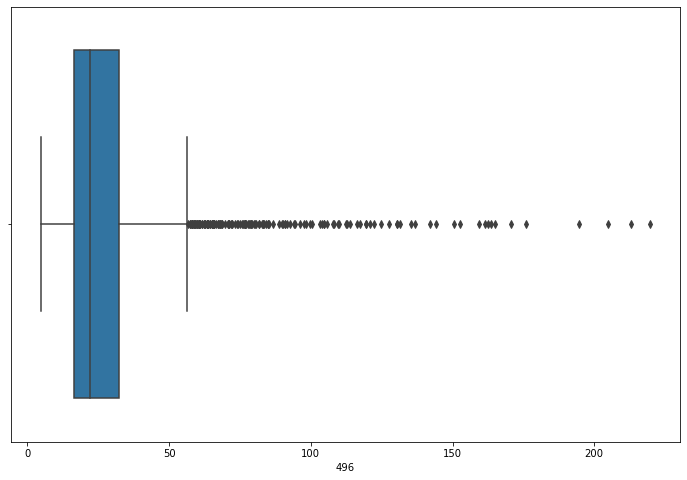

In [168]:
plt.figure(figsize=(12,8))
sns.boxplot(df_sig['496'])

<AxesSubplot:xlabel='496'>

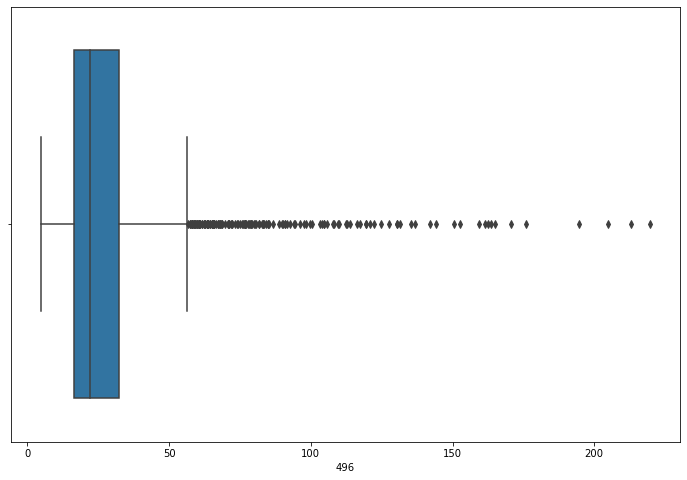

In [169]:
plt.figure(figsize=(12,8))
sns.boxplot(newdf1)

# Applying the median technique on all columns

In [181]:
df_sig_copy = df_sig.copy()

#We make a copy "df_sig_copy" of existing dataframe just so that if the actual raw file is required then 
#we shall use "df_sig"



def step2(x):
    knnimp = KNNImputer(n_neighbors=5)
    x = x.drop('Time',axis=1)
    b = knnimp.fit_transform(x)
    dd = pd.DataFrame(b,columns=a.columns)
    return dd
    

# for n in df_sig_copy.columns:
#     if n == 'Time' or n == 'Pass/Fail':
#         pass
#     else:
#         if df_sig_copy[n].isnull().sum()>0:
#             df_sig_copy[n].fillna(np.median(df_sig_copy[n].dropna(axis=0)),axis=0,inplace=True)
#         else:
#             pass


In [183]:
df_sig_copy = step2(df_sig_copy)

# Drop attribute/s if required using relevant functional knowledge.

In [184]:
# df_sig_copy.drop('Time',axis=1,inplace=True)


#We dropped time while imputing the missing values since we dont require time and date. Incase we were to 
#drop time seperately then we shall use above command

# Make all relevant modifications on the data using both functional/logical reasoning/assumption

In [185]:
df_sig_copy['Pass/Fail'].value_counts()
#Classes completely unblanaced, requires balancing

1.0    1463
0.0     104
Name: Pass/Fail, dtype: int64

In [186]:
#We try to take correlation of each columns for the "Pass/Fail" Target. Doing this we notice that there were NaN's which
#is due to constant values in those specific columns. For eg(as shown below): If we take column '5' from df_sig_copy
#dataframe, we notice that the unique values present is 100 and similarly for column 504 the unique value is 0 and this
#does not add any value in predicting the target "Pass/Fail"

In [187]:
df_sig_copy['5'].unique()

array([100.])

In [188]:
df_sig_copy['504'].unique()

array([0.])

#### In order to remove these columns, we will create a dataframe ff which will contain column 1 with column names and column 2 with the correlation values of each column against target "Pass/Fail"

In [189]:
ff = pd.DataFrame(df_sig_copy.corr()['Pass/Fail'].sort_values(ascending=False))
ff.reset_index(inplace=True)

In [190]:
drop_columns = ff[pd.isna(ff['Pass/Fail'])]['index'].values

#Pulling the column names that has NaN as correlation values

In [191]:
for a in drop_columns:
    df_sig_copy.drop(a,axis=1,inplace=True)
    
#With this we have removed all the columns that had either no correlation with target or columns that had constant value
#which does not add up to prediction.

## •Perform detailed relevant statistical analysis on the data.
## •Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis

In [192]:
df_sig_copy

#The dataframe that can be used

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.50050,0.01620,-0.00340,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.01942,0.01266,0.00438,65.5742,1.0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.49660,-0.00050,-0.01480,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.00960,0.02010,0.00600,208.2045,1.0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.44360,0.00410,0.00130,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.05840,0.04840,0.01480,82.8602,0.0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.48820,-0.01240,-0.00330,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.02020,0.01490,0.00440,73.8432,1.0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.50310,-0.00310,-0.00720,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.02020,0.01490,0.00440,73.8432,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.34240,-0.00450,-0.00570,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.00680,0.01380,0.00470,203.1720,1.0
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.43330,-0.00610,-0.00930,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.00680,0.01380,0.00470,203.1720,1.0
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,1.47424,-0.00684,-0.00486,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.01970,0.00860,0.00250,43.5231,1.0
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.46220,-0.00720,0.00320,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.02620,0.02450,0.00750,93.4941,1.0


In [193]:
# plt.figure(figsize=(100,100))
# col = 1
# for i in df_sig_copy.columns:
#     plt.subplot(30,10, col)
#     sns.distplot(df_sig_copy[i])
#     col += 1

# Segregate predictors vs target attributes

In [194]:
X = df_sig_copy.drop('Pass/Fail',axis=1)
# X will be the feature used to predict

y = df_sig_copy['Pass/Fail']
# y will be the target


# Check for target balancing and fix it if found imbalanced

In [195]:
y.value_counts(normalize=True)

#We have only 6.6% of class 0 data, we will try to balance the data using oversampling and SMOTE tomek technique

1.0    0.933631
0.0    0.066369
Name: Pass/Fail, dtype: float64

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
#Train Test split

OS = over_sampling.RandomOverSampler()
SM = over_sampling.SMOTE()
#instantiate the sampling technique

X_train_OS,y_train_OS = OS.fit_resample(X_train,y_train)
X_train_SM,y_train_SM = SM.fit_resample(X_train,y_train)
# Sample the data

In [197]:
y_train_OS.value_counts()

0.0    1021
1.0    1021
Name: Pass/Fail, dtype: int64

In [198]:
y_train_SM.value_counts()

0.0    1021
1.0    1021
Name: Pass/Fail, dtype: int64

# Perform train-test split and standardise the data or vice versa if require

#### I have performed the train test split before sampling the imbalanced dataset as i want the balance to happen only in train data and not on test data.

## Check if the train and test data have similar statistical characteristics when compared with original data

In [199]:
# Ho = Train, test mean data are not same.
# Ha = Is the Train and test data's mean the same?

In [200]:
X_data = [X_train,X_test,X_train_OS,X_train_SM]

for x_d in X_data:
    f, p = f_oneway(x_d, X)
    print(p.mean())
#     print(p)

0.7487897764717969
0.5983099254815024
0.2904380123760187
0.3092350514718014


### X_Train = We notice that P value for train and test data is greater than 0.5, we fail to reject null hypothesis for the X_train data. This means Train and Test data mean are not same

### X_Test = We notice that P value for Oversampled and SMOTE sampled data with X_test is less than 0.5. Here, we reject Null Hypothesis

# Model training, testing and tuning

### Pick up a supervised learning model.
#### Since this is a classification issue, we shall try all the classification models such as:
##### 1. Logistic Regression
##### 2. SVC
##### 3. Naive Bayes
##### 4. Decision Tree Classifier
##### 5. Random Forest Classifier
##### 6. Adaptive Boosting
##### 7. Gradient Boosting

### Along with this there are multiple columns which leads to Curse of Dimensionality issue. We apply Dimensionality reduction technique using PCA.

#### 1. We try to standardize the data and then make it available for PCA
#### 2. We apply PCA and get the best Eigen values that explain the most variance
#### 3. Transform the data and apply in all algorithms

# Pick up a supervised learning model. (Without hyperparameter tuning)

### 1. Logistic Regression

In [461]:
LR1 = LogisticRegression()
LR1.fit(X_train,y_train)
predLR1 = LR1.predict(X_test)

print(classification_report(y_test,predLR1))
print('\n')
print(confusion_matrix(y_test,predLR1))
print('\n')
print('The training score is',LR1.score(X_train,y_train))
print('The Test score is',LR1.score(X_test,y_test))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        29
         1.0       0.94      1.00      0.97       442

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.88      0.93      0.91       471



[[  0  29]
 [  2 440]]


The training score is 0.9315693430656934
The Test score is 0.9341825902335457


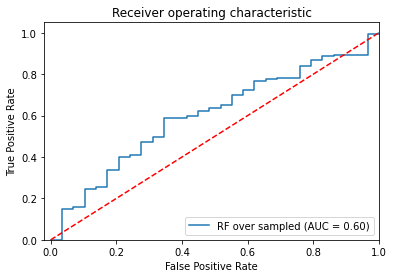

In [462]:
proba = LR1.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [463]:
Logit_nosampling = roc_auc_rfo

In [470]:
new_pred = np.where(proba[:,1]>0.65,1,0)
print(classification_report(y_test,new_pred))


              precision    recall  f1-score   support

         0.0       0.20      0.03      0.06        29
         1.0       0.94      0.99      0.96       442

    accuracy                           0.93       471
   macro avg       0.57      0.51      0.51       471
weighted avg       0.89      0.93      0.91       471



In [471]:
LR2 = LogisticRegression()
LR2.fit(X_train_OS,y_train_OS)
predLR2 = LR1.predict(X_test)

print(classification_report(y_test,predLR2))
print('\n')
print(confusion_matrix(y_test,predLR2))
print('\n')
print("This model with oversampled data also ends up with bad scores")

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        29
         1.0       0.94      1.00      0.97       442

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.88      0.93      0.91       471



[[  0  29]
 [  2 440]]


This model with oversampled data also ends up with bad scores


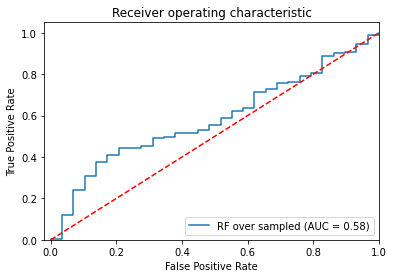

In [472]:
proba = LR2.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [477]:
Logit_oversampling = roc_auc_rfo
new_pred = np.where(proba[:,1]>0.65,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.08      0.66      0.14        29
         1.0       0.96      0.50      0.65       442

    accuracy                           0.51       471
   macro avg       0.52      0.58      0.40       471
weighted avg       0.90      0.51      0.62       471



In [647]:
LR3 = LogisticRegression()
LR3.fit(X_train_SM,y_train_SM)
predLR3 = LR3.predict(X_test)

print(classification_report(y_test,predLR3))
print('\n')
print(confusion_matrix(y_test,predLR3))
print('\n')
print("This model with SMOTE balanced data also ends up with bad scores but has few True Positives predicted.")

              precision    recall  f1-score   support

         0.0       0.08      0.45      0.13        29
         1.0       0.95      0.66      0.78       442

    accuracy                           0.64       471
   macro avg       0.51      0.55      0.45       471
weighted avg       0.89      0.64      0.74       471



[[ 13  16]
 [152 290]]


This model with SMOTE balanced data also ends up with bad scores but has few True Positives predicted.


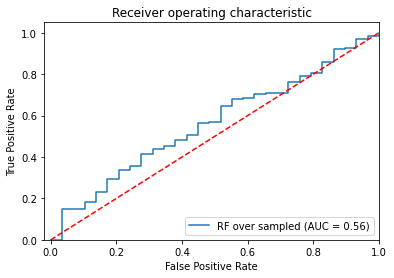

In [648]:
proba = LR3.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [651]:
Logit_SM_oversampling = roc_auc_rfo
new_pred = np.where(proba[:,1]>0.50,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.08      0.45      0.13        29
         1.0       0.95      0.66      0.78       442

    accuracy                           0.64       471
   macro avg       0.51      0.55      0.45       471
weighted avg       0.89      0.64      0.74       471



0.5606958963956936

### 2. SVC - Support Vector Classifier

In [486]:
svc1 = SVC()
svc1.fit(X_train,y_train)
predsvc1 = svc1.predict(X_test)

print(classification_report(y_test,predsvc1))
print('\n')
print(confusion_matrix(y_test,predsvc1))
print('\n')
print("This model definetly does not survives as there is a huge imbalanced dataset")

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        29
         1.0       0.94      1.00      0.97       442

    accuracy                           0.94       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.88      0.94      0.91       471



[[  0  29]
 [  0 442]]


This model definetly does not survives as there is a huge imbalanced dataset


In [487]:
svc2 = SVC()
svc2.fit(X_train_OS,y_train_OS)
predsvc2 = svc2.predict(X_test)

print(classification_report(y_test,predsvc2))
print('\n')
print(confusion_matrix(y_test,predsvc2))
print('\n')
print("This model has identified few True positives but has more False Negatives")

              precision    recall  f1-score   support

         0.0       0.07      0.28      0.12        29
         1.0       0.94      0.77      0.85       442

    accuracy                           0.74       471
   macro avg       0.51      0.52      0.48       471
weighted avg       0.89      0.74      0.80       471



[[  8  21]
 [101 341]]


This model has identified few True positives but has more False Negatives


In [488]:
svc3 = SVC()
svc3.fit(X_train_SM,y_train_SM)
predsvc3 = svc3.predict(X_test)

print(classification_report(y_test,predsvc3))
print('\n')
print(confusion_matrix(y_test,predsvc3))
print('\n')
print("This model has identified few additional True positives but has more False Negatives")

              precision    recall  f1-score   support

         0.0       0.05      0.24      0.09        29
         1.0       0.94      0.73      0.82       442

    accuracy                           0.70       471
   macro avg       0.50      0.48      0.45       471
weighted avg       0.88      0.70      0.77       471



[[  7  22]
 [121 321]]


This model has identified few additional True positives but has more False Negatives


### 3. Naive Bayes classifier

In [218]:
NB1 = GaussianNB()
NB1.fit(X_train,y_train)
predNB1 = NB1.predict(X_test)

print(classification_report(y_test,predNB1))
print('\n')
print(confusion_matrix(y_test,predNB1))
print('\n')
print("This model has identified few additional True positives but has more False Negatives")

              precision    recall  f1-score   support

         0.0       0.06      0.86      0.11        29
         1.0       0.94      0.13      0.23       442

    accuracy                           0.18       471
   macro avg       0.50      0.50      0.17       471
weighted avg       0.88      0.18      0.22       471



[[ 25   4]
 [384  58]]


This model has identified few additional True positives but has more False Negatives


In [219]:
NB2 = GaussianNB()
NB2.fit(X_train_OS,y_train_OS)
predNB2 = NB2.predict(X_test)

print(classification_report(y_test,predNB2))
print('\n')
print(confusion_matrix(y_test,predNB2))
print('\n')


              precision    recall  f1-score   support

         0.0       0.06      0.86      0.11        29
         1.0       0.93      0.11      0.20       442

    accuracy                           0.16       471
   macro avg       0.49      0.49      0.16       471
weighted avg       0.87      0.16      0.20       471



[[ 25   4]
 [392  50]]




In [220]:
NB3 = GaussianNB()
NB3.fit(X_train_SM,y_train_SM)
predNB3 = NB3.predict(X_test)

print(classification_report(y_test,predNB3))
print('\n')
print(confusion_matrix(y_test,predNB3))
print('\n')


              precision    recall  f1-score   support

         0.0       0.06      0.86      0.12        29
         1.0       0.95      0.16      0.27       442

    accuracy                           0.20       471
   macro avg       0.50      0.51      0.19       471
weighted avg       0.89      0.20      0.26       471



[[ 25   4]
 [372  70]]




### 4. Decision Tree Classifier

In [489]:
#For decision tree classifier we have to apply hyper parameter tuning as it may lead to overfitting, we choose only 
# max_depth pruning as hyper parameter.

DTC1 = DecisionTreeClassifier()
param_grid = {'max_depth':[5,10,15,20,25,30,35,40]}
skf = StratifiedKFold(n_splits=5)
gcv1 = GridSearchCV(estimator=DTC1,param_grid = param_grid,cv=skf)

gcv1.fit(X_train,y_train)
predDTC1 = gcv1.predict(X_test)

print(classification_report(y_test,predDTC1))
print('\n')
print(confusion_matrix(y_test,predDTC1))
print('\n')


              precision    recall  f1-score   support

         0.0       0.14      0.10      0.12        29
         1.0       0.94      0.96      0.95       442

    accuracy                           0.90       471
   macro avg       0.54      0.53      0.53       471
weighted avg       0.89      0.90      0.90       471



[[  3  26]
 [ 19 423]]




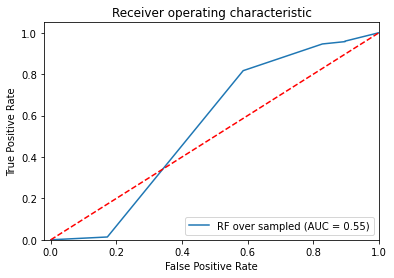

In [490]:
proba = gcv1.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [491]:
DTC_nosampling = roc_auc_rfo
new_pred = np.where(proba[:,1]>0.43,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.14      0.10      0.12        29
         1.0       0.94      0.96      0.95       442

    accuracy                           0.90       471
   macro avg       0.54      0.53      0.53       471
weighted avg       0.89      0.90      0.90       471



In [494]:
DTC2 = DecisionTreeClassifier()
param_grid = {'max_depth':[5,10,15,20,25,30,35,40]}
skf2 = StratifiedKFold(n_splits=5)
gcv2 = GridSearchCV(estimator=DTC2,param_grid = param_grid,cv=skf2)

gcv2.fit(X_train_OS,y_train_OS)
predDTC2 = gcv2.predict(X_test)

print(classification_report(y_test,predDTC2))
print('\n')
print(confusion_matrix(y_test,predDTC2))
print('\n')


              precision    recall  f1-score   support

         0.0       0.16      0.21      0.18        29
         1.0       0.95      0.93      0.94       442

    accuracy                           0.89       471
   macro avg       0.55      0.57      0.56       471
weighted avg       0.90      0.89      0.89       471



[[  6  23]
 [ 31 411]]




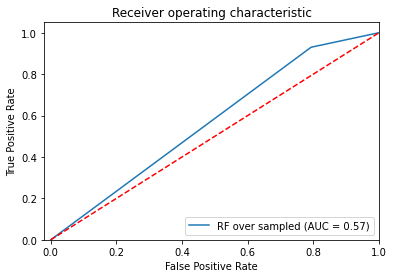

In [495]:
proba = gcv2.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [496]:
DTC_oversampling = roc_auc_rfo
new_pred = np.where(proba[:,1]>0.45,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.16      0.21      0.18        29
         1.0       0.95      0.93      0.94       442

    accuracy                           0.89       471
   macro avg       0.55      0.57      0.56       471
weighted avg       0.90      0.89      0.89       471



In [499]:
# From here

In [500]:
DTC3 = DecisionTreeClassifier()
param_grid = {'max_depth':[5,10,15,20,25,30,35,40]}
skf3 = StratifiedKFold(n_splits=5)
gcv3 = GridSearchCV(estimator=DTC3,param_grid = param_grid,cv=skf3)

gcv3.fit(X_train_SM,y_train_SM)
predDTC3 = gcv3.predict(X_test)

print(classification_report(y_test,predDTC3))
print('\n')
print(confusion_matrix(y_test,predDTC3))
print('\n')


              precision    recall  f1-score   support

         0.0       0.11      0.31      0.17        29
         1.0       0.95      0.84      0.89       442

    accuracy                           0.81       471
   macro avg       0.53      0.57      0.53       471
weighted avg       0.90      0.81      0.85       471



[[  9  20]
 [ 71 371]]




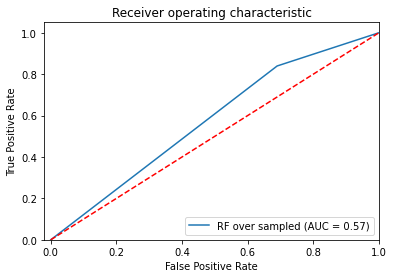

In [501]:
proba = gcv3.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [502]:
DTC_SMOTE = roc_auc_rfo
new_pred = np.where(proba[:,1]>0.44,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.11      0.31      0.17        29
         1.0       0.95      0.84      0.89       442

    accuracy                           0.81       471
   macro avg       0.53      0.57      0.53       471
weighted avg       0.90      0.81      0.85       471



### 5. Random Forest Classifier

In [503]:
rfc1 = RandomForestClassifier()
param_grid = {'n_estimators':[100,200,300,400]}
skfrfc1 = StratifiedKFold(n_splits=5)
gcv4 = GridSearchCV(estimator=rfc1,param_grid = param_grid,cv=skfrfc1)
gcv4.fit(X_train,y_train)
predrfc1 = gcv4.predict(X_test)

print(classification_report(y_test,predrfc1))
print('\n')
print(confusion_matrix(y_test,predrfc1))
print('\n')

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        29
         1.0       0.94      1.00      0.97       442

    accuracy                           0.94       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.88      0.94      0.91       471



[[  0  29]
 [  1 441]]




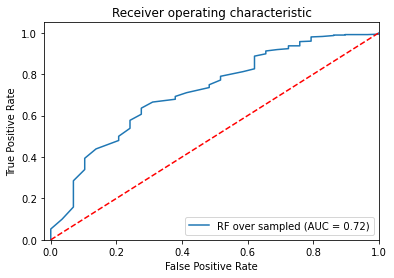

In [504]:
proba = gcv4.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [505]:
RFC_nosampling = roc_auc_rfo
new_pred = np.where(proba[:,1]>0.43,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        29
         1.0       0.94      1.00      0.97       442

    accuracy                           0.94       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.88      0.94      0.91       471



In [506]:
rfc2 = RandomForestClassifier()
param_grid = {'n_estimators':[100,200,300,400]}
skfrfc2 = StratifiedKFold(n_splits=5)
gcv5 = GridSearchCV(estimator=rfc2,param_grid = param_grid,cv=skfrfc2)
gcv5.fit(X_train_OS,y_train_OS)
predrfc2 = gcv5.predict(X_test)

print(classification_report(y_test,predrfc2))
print('\n')
print(confusion_matrix(y_test,predrfc2))
print('\n')

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        29
         1.0       0.94      1.00      0.97       442

    accuracy                           0.94       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.88      0.94      0.91       471



[[  0  29]
 [  0 442]]




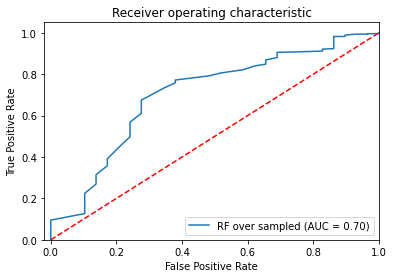

In [507]:
proba = gcv5.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [508]:
RFC_oversampling = roc_auc_rfo
new_pred = np.where(proba[:,1]>0.71,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.27      0.10      0.15        29
         1.0       0.94      0.98      0.96       442

    accuracy                           0.93       471
   macro avg       0.61      0.54      0.56       471
weighted avg       0.90      0.93      0.91       471



In [509]:
rfc3 = RandomForestClassifier()
param_grid = {'n_estimators':[100,200,300,400]}
skfrfc3 = StratifiedKFold(n_splits=5)
gcv6 = GridSearchCV(estimator=rfc3,param_grid = param_grid,cv=skfrfc3)
gcv6.fit(X_train_SM,y_train_SM)
predrfc3 = gcv6.predict(X_test)

print(classification_report(y_test,predrfc3))
print('\n')
print(confusion_matrix(y_test,predrfc3))
print('\n')

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        29
         1.0       0.94      1.00      0.97       442

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.88      0.93      0.91       471



[[  0  29]
 [  2 440]]




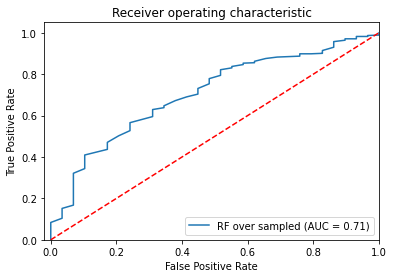

In [510]:
proba = gcv6.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [511]:
RFC_SMOTE = roc_auc_rfo
new_pred = np.where(proba[:,1]>0.73,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.15      0.41      0.22        29
         1.0       0.96      0.85      0.90       442

    accuracy                           0.82       471
   macro avg       0.55      0.63      0.56       471
weighted avg       0.91      0.82      0.86       471



### 6. Adaptive Boosting

In [512]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train,y_train)
predada1 = ada.predict(X_test)
print(classification_report(y_test,predada1))
print('\n')
print(confusion_matrix(y_test,predada1))
print('\n')

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        29
         1.0       0.94      0.97      0.95       442

    accuracy                           0.91       471
   macro avg       0.47      0.48      0.48       471
weighted avg       0.88      0.91      0.89       471



[[  0  29]
 [ 15 427]]




In [513]:
ada2 = AdaBoostClassifier(n_estimators=100)
ada2.fit(X_train_OS,y_train_OS)
predada2 = ada2.predict(X_test)
print(classification_report(y_test,predada2))
print('\n')
print(confusion_matrix(y_test,predada2))
print('\n')

              precision    recall  f1-score   support

         0.0       0.18      0.24      0.21        29
         1.0       0.95      0.93      0.94       442

    accuracy                           0.89       471
   macro avg       0.56      0.58      0.57       471
weighted avg       0.90      0.89      0.89       471



[[  7  22]
 [ 32 410]]




In [514]:
ada3 = AdaBoostClassifier(n_estimators=100)
ada3.fit(X_train_OS,y_train_OS)
predada3 = ada3.predict(X_test)
print(classification_report(y_test,predada3))
print('\n')
print(confusion_matrix(y_test,predada3))
print('\n')

              precision    recall  f1-score   support

         0.0       0.18      0.24      0.21        29
         1.0       0.95      0.93      0.94       442

    accuracy                           0.89       471
   macro avg       0.56      0.58      0.57       471
weighted avg       0.90      0.89      0.89       471



[[  7  22]
 [ 32 410]]




### 7. Gradient Boosting Technique

In [515]:
Xgboost1 = GradientBoostingClassifier(n_estimators=100)
Xgboost1.fit(X_train,y_train)
predxg1 = Xgboost1.predict(X_test)
print(classification_report(y_test,predxg1))
print('\n')
print(confusion_matrix(y_test,predxg1))
print('\n')

              precision    recall  f1-score   support

         0.0       0.12      0.03      0.05        29
         1.0       0.94      0.98      0.96       442

    accuracy                           0.93       471
   macro avg       0.53      0.51      0.51       471
weighted avg       0.89      0.93      0.91       471



[[  1  28]
 [  7 435]]




In [516]:
Xgboost2 = GradientBoostingClassifier(n_estimators=100)
Xgboost2.fit(X_train_OS,y_train_OS)
predxg2 = Xgboost2.predict(X_test)
print(classification_report(y_test,predxg2))
print('\n')
print(confusion_matrix(y_test,predxg2))
print('\n')

              precision    recall  f1-score   support

         0.0       0.20      0.07      0.10        29
         1.0       0.94      0.98      0.96       442

    accuracy                           0.93       471
   macro avg       0.57      0.53      0.53       471
weighted avg       0.90      0.93      0.91       471



[[  2  27]
 [  8 434]]




In [517]:
Xgboost3 = GradientBoostingClassifier(n_estimators=100)
Xgboost3.fit(X_train_SM,y_train_SM)
predxg3 = Xgboost3.predict(X_test)
print(classification_report(y_test,predxg3))
print('\n')
print(confusion_matrix(y_test,predxg3))
print('\n')

              precision    recall  f1-score   support

         0.0       0.22      0.14      0.17        29
         1.0       0.94      0.97      0.96       442

    accuracy                           0.92       471
   macro avg       0.58      0.55      0.56       471
weighted avg       0.90      0.92      0.91       471



[[  4  25]
 [ 14 428]]




## We notice that none of the above mentioned models provided a good score balancing both classes. Hence, we shall try dimensionality reduction technique on Oversampled and SMOTE balanced data and then use classification models with hyperparameter tuning.

In [518]:
pca_OS = PCA(n_components=20)
pca_SM = PCA(n_components=20)
SS_OS = StandardScaler()
SS_SM = StandardScaler()
X_train_OS_pca = SS_OS.fit_transform(X_train_OS)
X_train_SM_pca = SS_SM.fit_transform(X_train_SM)

pca_OS.fit_transform(X_train_OS_pca)
pca_SM.fit_transform(X_train_SM_pca)

array([[-1.3596158 , -0.41462799,  2.62540631, ...,  4.35697965,
        -7.22491931,  1.15896596],
       [-0.38783176, -1.42183356,  3.4725243 , ...,  1.37394753,
        -3.77148954,  2.38353603],
       [-0.35683588, -3.05453625, -1.42275691, ...,  0.04567223,
        -0.70329457,  1.69413439],
       ...,
       [-1.02173935, -0.79845277,  1.82571577, ...,  2.84949313,
         1.05483212,  4.97351861],
       [-0.29023099, -1.80168031, -0.69434225, ...,  0.33043931,
         0.52530388,  3.03652352],
       [ 0.56466507, -0.55473588, -1.34525523, ...,  0.24797836,
        -1.33724558,  2.65373995]])

In [519]:
pca_OS.explained_variance_

array([29.04562476, 22.34393752, 13.0683589 , 11.98946112, 10.37390093,
        9.87157289,  9.68666552,  8.61028149,  8.41992812,  8.17857947,
        7.74854298,  7.02510082,  6.97986713,  6.70525241,  6.49951143,
        6.20415627,  6.11647884,  5.96409685,  5.7865361 ,  5.45424979])

In [520]:
pca_SM.explained_variance_

array([27.02409841, 23.97066242, 13.15746976, 12.09120086, 10.50650628,
        9.74453128,  9.19540867,  8.83047401,  8.35240772,  7.83501821,
        7.13910266,  7.05046702,  6.82616648,  6.45685118,  6.36420191,
        6.18062416,  5.76600287,  5.70920464,  5.62474095,  5.39176782])

In [521]:
pca_SM.explained_variance_ratio_

# we notice a good amount of variance ratio explained for SMOTE balanced data when PCA components is given as 8 

array([0.06400679, 0.0567747 , 0.03116357, 0.0286381 , 0.02488474,
       0.02308   , 0.0217794 , 0.02091505, 0.01978274, 0.0185573 ,
       0.01690902, 0.01669909, 0.01616783, 0.0152931 , 0.01507366,
       0.01463886, 0.01365682, 0.0135223 , 0.01332224, 0.01277044])

In [522]:
pca_OS.explained_variance_ratio_

# we notice a good amount of variance ratio explained for Oversampleddata when PCA components is given as 9

array([0.06879479, 0.05292179, 0.03095251, 0.02839713, 0.02457067,
       0.0233809 , 0.02294294, 0.02039352, 0.01994267, 0.01937103,
       0.01835248, 0.01663901, 0.01653187, 0.01588144, 0.01539414,
       0.01469459, 0.01448693, 0.01412601, 0.01370546, 0.01291843])

# 1.1 Logitstic Regression

#### Over sampled data

In [523]:
LG_1 = LogisticRegression()
param_grid = {'n_jobs':[5]}
skf = StratifiedKFold(n_splits=5)
GSCV = GridSearchCV(estimator = LG_1,param_grid=param_grid,cv=skf)
pipe = Pipeline([('scale',StandardScaler()),
                 ('pca',PCA(n_components=25)),
                 ('model',GSCV)])

In [524]:
pipe.fit(X_train_OS,y_train_OS)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=25)),
                ('model',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'n_jobs': [5]}))])

In [525]:
pred1 = pipe.predict(X_test)

In [526]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.10      0.55      0.18        29
         1.0       0.96      0.69      0.80       442

    accuracy                           0.68       471
   macro avg       0.53      0.62      0.49       471
weighted avg       0.91      0.68      0.76       471



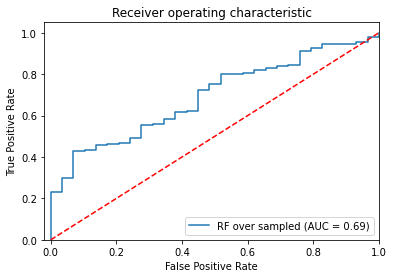

In [527]:
proba = pipe.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [528]:
Logit_PCA_oversampling = roc_auc_rfo
new_pred = np.where(proba[:,1]>0.69,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.10      0.93      0.17        29
         1.0       0.99      0.42      0.59       442

    accuracy                           0.45       471
   macro avg       0.54      0.68      0.38       471
weighted avg       0.93      0.45      0.56       471



####  SMOTE balanced data

In [529]:
LG_2 = LogisticRegression()
param_grid = {'n_jobs':[5,10]}
skf1 = StratifiedKFold(n_splits=5)
GSCV1 = GridSearchCV(estimator = LG_2, param_grid = param_grid,cv=skf1)
pipe1 = Pipeline([('scale',StandardScaler()),
                 ('pca',PCA(n_components=9)),
                 ('model',GSCV1)])

In [530]:
pipe1.fit(X_train_SM,y_train_SM)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=9)),
                ('model',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'n_jobs': [5, 10]}))])

In [531]:
pred2 = pipe1.predict(X_test)

In [532]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

         0.0       0.11      0.62      0.18        29
         1.0       0.96      0.66      0.78       442

    accuracy                           0.66       471
   macro avg       0.54      0.64      0.48       471
weighted avg       0.91      0.66      0.75       471



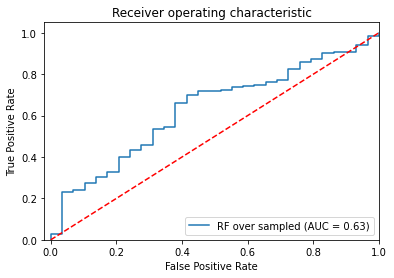

In [533]:
proba = pipe1.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [534]:
Logit_PCA_SMOTE = roc_auc_rfo
new_pred = np.where(proba[:,1]>0.63,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.08      0.76      0.14        29
         1.0       0.96      0.41      0.58       442

    accuracy                           0.43       471
   macro avg       0.52      0.59      0.36       471
weighted avg       0.91      0.43      0.55       471



## 1.2 SVC - Support Vector Classifier

#### Over sampled data

In [535]:
# svc_1 = SVC()
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
# GSCV2 = GridSearchCV(estimator = svc_1,param_grid=param_grid)
# pipe2 = Pipeline([('scale',StandardScaler()),
#                  ('pca',PCA(n_components=9)),
#                  ('model',GSCV2)])

In [536]:
# pipe2.fit(X_train_OS,y_train_OS)

In [537]:
# pred3 = pipe2.predict(X_test)

In [538]:
# print(classification_report(y_test,pred3))

#### SMOTE Balanced 

In [539]:
# svc_2 = SVC()
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
# GSCV3 = GridSearchCV(estimator = svc_2,param_grid=param_grid)
# pipe3 = Pipeline([('scale',StandardScaler()),
#                  ('pca',PCA(n_components=8)),
#                  ('model',GSCV3)])

In [540]:
# pipe3.fit(X_train_OS,y_train_OS)

In [541]:
# pred4 = pipe3.predict(X_test)

In [542]:
# print(classification_report(y_test,pred4))

## 1.3 GaussianNB

In [543]:
gnb1 = GaussianNB()
skf2= StratifiedKFold(n_splits=5)
param_grid = {'priors':[None]}
GSCV4 = GridSearchCV(estimator = gnb1,param_grid=param_grid,cv=skf2)
pipe4 = Pipeline([('scale',StandardScaler()),
                 ('pca',PCA(n_components=9)),
                 ('model',GSCV4)])

In [544]:
pipe4.fit(X_train_OS,y_train_OS)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=9)),
                ('model',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'priors': [None]}))])

In [545]:
pred5 = pipe4.predict(X_test)

In [546]:
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

         0.0       0.03      0.03      0.03        29
         1.0       0.94      0.93      0.93       442

    accuracy                           0.87       471
   macro avg       0.48      0.48      0.48       471
weighted avg       0.88      0.87      0.88       471



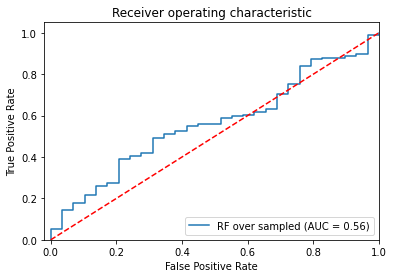

In [547]:
proba = pipe4.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [548]:
GuassianNB_PCA_oversampling = roc_auc_rfo
new_pred = np.where(proba[:,1]>0.60,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.08      0.21      0.12        29
         1.0       0.94      0.85      0.90       442

    accuracy                           0.81       471
   macro avg       0.51      0.53      0.51       471
weighted avg       0.89      0.81      0.85       471



In [549]:
gnb2 = GaussianNB()
param_grid = {'priors':[None]}
skf3= StratifiedKFold(n_splits=5)
GSCV5 = GridSearchCV(estimator = gnb2,param_grid=param_grid,cv=skf3)
pipe5 = Pipeline([('scale',StandardScaler()),
                 ('pca',PCA(n_components=9)),
                 ('model',GSCV5)])

In [550]:
pipe5.fit(X_train_SM,y_train_SM)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=9)),
                ('model',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'priors': [None]}))])

In [551]:
pred6 = pipe5.predict(X_test)

In [552]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

         0.0       0.09      0.52      0.15        29
         1.0       0.95      0.64      0.77       442

    accuracy                           0.63       471
   macro avg       0.52      0.58      0.46       471
weighted avg       0.90      0.63      0.73       471



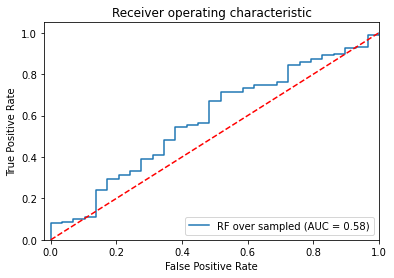

In [553]:
proba = pipe5.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [554]:
GuassianNB_PCA_SMOTE = roc_auc_rfo
new_pred = np.where(proba[:,1]>0.58,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.07      0.66      0.13        29
         1.0       0.95      0.46      0.62       442

    accuracy                           0.48       471
   macro avg       0.51      0.56      0.38       471
weighted avg       0.90      0.48      0.59       471



## 1.4 Decision Tree Classifier

In [555]:
dct_1 = DecisionTreeClassifier()
skf4 = StratifiedKFold(n_splits=5)
param_grid = {'max_depth':[10,20,30,40,50,60,70,80,90,100]}
GSCV6 = GridSearchCV(estimator = dct_1,param_grid=param_grid,cv=skf4)
pipe6 = Pipeline([('scale',StandardScaler()),
                 ('pca',PCA(n_components=25)),
                 ('model',GSCV6)])

In [556]:
pipe6.fit(X_train_OS,y_train_OS)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=25)),
                ('model',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'max_depth': [10, 20, 30, 40, 50, 60,
                                                        70, 80, 90, 100]}))])

In [557]:
pred7 = pipe6.predict(X_test)

In [558]:
print(classification_report(y_test,pred7))

              precision    recall  f1-score   support

         0.0       0.07      0.03      0.05        29
         1.0       0.94      0.97      0.95       442

    accuracy                           0.91       471
   macro avg       0.51      0.50      0.50       471
weighted avg       0.89      0.91      0.90       471



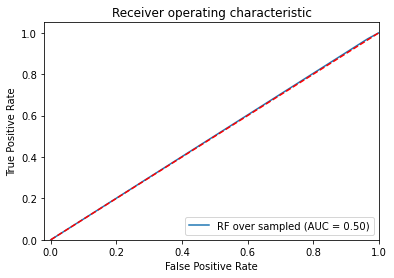

In [559]:
proba = pipe6.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [560]:
DCT_PCA_OS = roc_auc_rfo
new_pred = np.where(proba[:,1]>0.53,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.07      0.03      0.05        29
         1.0       0.94      0.97      0.95       442

    accuracy                           0.91       471
   macro avg       0.51      0.50      0.50       471
weighted avg       0.89      0.91      0.90       471



In [561]:
dct_2 = DecisionTreeClassifier()
skf5 = StratifiedKFold(n_splits=5)
param_grid = {'max_depth':[10,20,30,40,50,60,70,80,90,100]}
GSCV7 = GridSearchCV(estimator = dct_2,param_grid=param_grid,cv=skf5)
pipe7 = Pipeline([('scale',StandardScaler()),
                 ('pca',PCA(n_components=9)),
                 ('model',GSCV7)])

In [562]:
pipe7.fit(X_train_SM,y_train_SM)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=9)),
                ('model',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'max_depth': [10, 20, 30, 40, 50, 60,
                                                        70, 80, 90, 100]}))])

In [563]:
pred8 = pipe7.predict(X_test)

In [564]:
print(classification_report(y_test,pred8))

              precision    recall  f1-score   support

         0.0       0.13      0.52      0.21        29
         1.0       0.96      0.77      0.86       442

    accuracy                           0.76       471
   macro avg       0.54      0.64      0.53       471
weighted avg       0.91      0.76      0.82       471



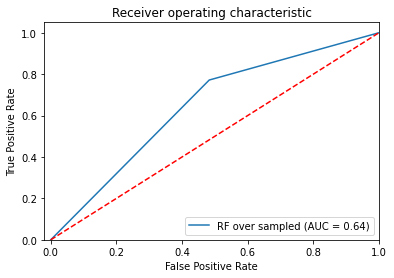

In [565]:
proba = pipe7.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [566]:
DCT_PCA_SM = roc_auc_rfo
new_pred = np.where(proba[:,1]>0.60,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.13      0.52      0.21        29
         1.0       0.96      0.77      0.86       442

    accuracy                           0.76       471
   macro avg       0.54      0.64      0.53       471
weighted avg       0.91      0.76      0.82       471



## 1.5 Random Forest Classifier 

In [567]:
RFC_1 = RandomForestClassifier()
skf6=StratifiedKFold()
param_grid = {'n_estimators':[100,200,300,400,500,600,700,800]}
GSCV8 = GridSearchCV(estimator = RFC_1,param_grid=param_grid,cv=skf6)
pipe8 = Pipeline([('scale',StandardScaler()),
                 ('pca',PCA(n_components=9)),
                 ('model',GSCV8)])

In [568]:
pipe8.fit(X_train_OS,y_train_OS)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=9)),
                ('model',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'n_estimators': [100, 200, 300, 400,
                                                           500, 600, 700,
                                                           800]}))])

In [569]:
pred9 = pipe8.predict(X_test)

In [570]:
print(classification_report(y_test,pred9))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        29
         1.0       0.94      1.00      0.97       442

    accuracy                           0.94       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.88      0.94      0.91       471



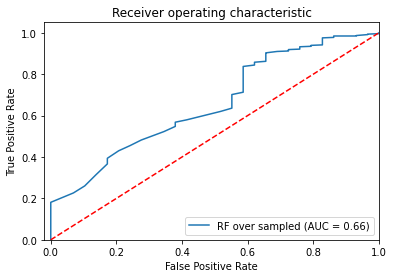

In [571]:
proba = pipe8.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [572]:
RFC_PCA_OS = roc_auc_rfo
new_pred = np.where(proba[:,1]>0.41,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        29
         1.0       0.94      1.00      0.97       442

    accuracy                           0.94       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.88      0.94      0.91       471



In [737]:
RFC_2 = RandomForestClassifier()
param_grid = {'n_estimators':[100,200,300,400,500,600,700,800]}
skf7 = StratifiedKFold(n_splits=5)
GSCV9 = GridSearchCV(estimator = RFC_2,param_grid=param_grid,cv=skf7)
pipe9 = Pipeline([('scale',StandardScaler()),
                 ('pca',PCA(n_components=8)),
                 ('model',GSCV9)])

In [738]:
pipe9.fit(X_train_SM,y_train_SM)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=8)),
                ('model',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'n_estimators': [100, 200, 300, 400,
                                                           500, 600, 700,
                                                           800]}))])

In [739]:
pred10 = pipe9.predict(X_test)

In [740]:
print(classification_report(y_test,pred10))

              precision    recall  f1-score   support

         0.0       0.19      0.38      0.26        29
         1.0       0.96      0.90      0.93       442

    accuracy                           0.86       471
   macro avg       0.57      0.64      0.59       471
weighted avg       0.91      0.86      0.88       471



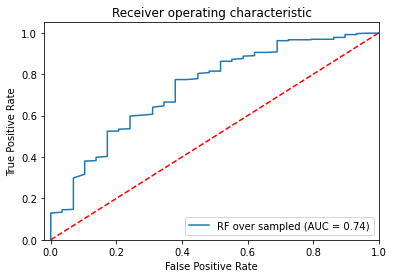

In [741]:
proba = pipe9.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [742]:
RFC_PCA_SM = roc_auc_rfo
new_pred = np.where(proba[:,1]>0.38,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.35      0.31      0.33        29
         1.0       0.96      0.96      0.96       442

    accuracy                           0.92       471
   macro avg       0.65      0.64      0.64       471
weighted avg       0.92      0.92      0.92       471



## 1.6 Adaptive Boosting

In [579]:
ada_1 = AdaBoostClassifier()
param_grid = {'n_estimators':[50,60,70,80,90,100,110,120]}
skf8 = StratifiedKFold(n_splits=5)
GSCV10 = GridSearchCV(estimator = ada_1,param_grid=param_grid,cv=skf8)
pipe11 = Pipeline([('scale',StandardScaler()),
                 ('pca',PCA(n_components=9)),
                 ('model',GSCV10)])

In [580]:
pipe11.fit(X_train_OS,y_train_OS)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=9)),
                ('model',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=AdaBoostClassifier(),
                              param_grid={'n_estimators': [50, 60, 70, 80, 90,
                                                           100, 110, 120]}))])

In [581]:
pred11 = pipe11.predict(X_test)

In [582]:
print(classification_report(y_test,pred11))

              precision    recall  f1-score   support

         0.0       0.11      0.21      0.14        29
         1.0       0.94      0.88      0.91       442

    accuracy                           0.84       471
   macro avg       0.52      0.55      0.53       471
weighted avg       0.89      0.84      0.87       471



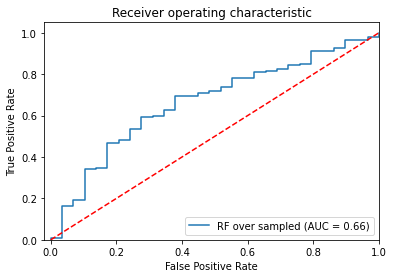

In [583]:
proba = pipe11.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [584]:
Adaptive_PCA_OS = roc_auc_rfo
new_pred = np.where(proba[:,1]>0.40,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        29
         1.0       0.94      1.00      0.97       442

    accuracy                           0.94       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.88      0.94      0.91       471



In [585]:
ada_2 = AdaBoostClassifier()
skf9 = StratifiedKFold(n_splits=5)
param_grid = {'n_estimators':[50,60,70,80,90,100,110,120]}
GSCV11 = GridSearchCV(estimator = ada_2,param_grid=param_grid,cv=skf9)
pipe12 = Pipeline([('scale',StandardScaler()),
                 ('pca',PCA(n_components=9)),
                 ('model',GSCV11)])

In [586]:
pipe12.fit(X_train_SM,y_train_SM)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=9)),
                ('model',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=AdaBoostClassifier(),
                              param_grid={'n_estimators': [50, 60, 70, 80, 90,
                                                           100, 110, 120]}))])

In [587]:
pred12 = pipe12.predict(X_test)

In [588]:
print(classification_report(y_test,pred12))

              precision    recall  f1-score   support

         0.0       0.11      0.52      0.18        29
         1.0       0.96      0.72      0.82       442

    accuracy                           0.71       471
   macro avg       0.53      0.62      0.50       471
weighted avg       0.91      0.71      0.79       471



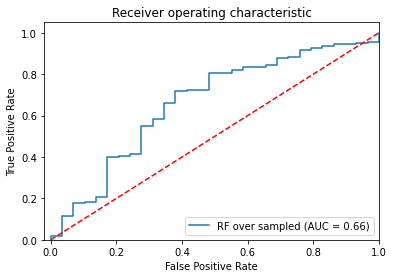

In [589]:
proba = pipe12.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [590]:
Adaptive_PCA_SM =  roc_auc_rfo
new_pred = np.where(proba[:,1]>0.61,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.06      1.00      0.12        29
         1.0       0.00      0.00      0.00       442

    accuracy                           0.06       471
   macro avg       0.03      0.50      0.06       471
weighted avg       0.00      0.06      0.01       471



# 1.7 Gradient Boosting

In [591]:
gra_1 = GradientBoostingClassifier()
param_grid = {'n_estimators':[100,120,140,160,180,200]}
skf11 = StratifiedKFold(n_splits=5)
GSCV11 = GridSearchCV(estimator = gra_1,param_grid=param_grid,cv=skf11)
pipe13 = Pipeline([('scale',StandardScaler()),
                 ('pca',PCA(n_components=9)),
                 ('model',GSCV11)])

In [592]:
pipe13.fit(X_train_OS,y_train_OS)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=9)),
                ('model',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GradientBoostingClassifier(),
                              param_grid={'n_estimators': [100, 120, 140, 160,
                                                           180, 200]}))])

In [593]:
pred13 = pipe13.predict(X_test)

In [594]:
print(classification_report(y_test,pred13))

              precision    recall  f1-score   support

         0.0       0.12      0.10      0.11        29
         1.0       0.94      0.95      0.94       442

    accuracy                           0.90       471
   macro avg       0.53      0.53      0.53       471
weighted avg       0.89      0.90      0.89       471



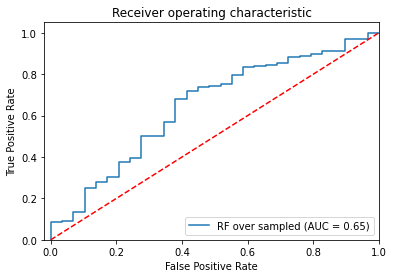

In [595]:
proba = pipe13.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [596]:
gradient_PCA_OS =  roc_auc_rfo
new_pred = np.where(proba[:,1]>0.58,1,0)
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.08      0.10      0.09        29
         1.0       0.94      0.93      0.93       442

    accuracy                           0.87       471
   macro avg       0.51      0.51      0.51       471
weighted avg       0.89      0.87      0.88       471



In [597]:
gra_2 = GradientBoostingClassifier()
param_grid = {'n_estimators':[100,120,140,160,180,200,250,300]}
skf12 = StratifiedKFold(n_splits=5)
GSCV12 = GridSearchCV(estimator = gra_2,param_grid=param_grid,cv=skf12)
pipe14 = Pipeline([('scale',StandardScaler()),
                 ('pca',PCA(n_components=9)),
                 ('model',GSCV12)])

In [598]:
pipe14.fit(X_train_SM,y_train_SM)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=9)),
                ('model',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GradientBoostingClassifier(),
                              param_grid={'n_estimators': [100, 120, 140, 160,
                                                           180, 200, 250,
                                                           300]}))])

In [599]:
pred14 = pipe14.predict(X_test)

In [600]:
print(classification_report(y_test,pred14))

              precision    recall  f1-score   support

         0.0       0.15      0.48      0.23        29
         1.0       0.96      0.82      0.89       442

    accuracy                           0.80       471
   macro avg       0.56      0.65      0.56       471
weighted avg       0.91      0.80      0.85       471



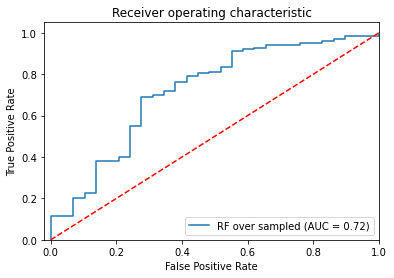

In [601]:
proba = pipe14.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [602]:
gradient_PCA_SM =  roc_auc_rfo

In [613]:
new_pred = np.where(proba[:,1]>0.30,1,0)

In [614]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.24      0.41      0.30        29
         1.0       0.96      0.91      0.94       442

    accuracy                           0.88       471
   macro avg       0.60      0.66      0.62       471
weighted avg       0.91      0.88      0.90       471



## The model RFC_2 is the only model that gives a better F1 score of 29% for class 0 and 92% for class 1. Its named using pipe9 and if we set threshold to 0.7 then the Recall goes to 66% class0 and 68% for class 1.

# PROJECT  OBJECTIVE: We  will  build  a  classifier  to  predict  the  Pass/Fail  yield  of  a  particular  process  entity  and  analyse  whether  all  the features are required to build the model or not.

### As the project objective states to build a classifier to predict pass/fail, we will mainly focus on reducing the misclassification of Fail. This is because if a machine is incorrectly classified as fail but actually it is pass, this will be false positive but on further checks it will be identified that the machine works fine, whereas if the machine is incorrectly classified as pass but actually if something has failed, the machine will be run and the issue will be identified post the output product is received.

### We cannot afford to run a machine that has faults, so we will focus on reducing false negative ie: The actual is fail but system predicts it as pass 

### There is also a problem with the way how classes are shared, we have 93.3% of classes thats a pass and only 6.6% class thats fail. Even if we apply random oversampling or SMOTE tomek technique to oversample minority class we still dont have enough data to capture variance in class 0. 

### What we can try is that, apply Tomek Tlinks which will cut all the majority points that is overlapping with minority points and then applying SMOTE technique to oversample minority classes by 60% only. The reason why we go for 60% is to reduce unnecessary synthetic points which might not help.

### Post this we will try applying the same RFC classifier as it works the best till now

# OR

### Try downsampling the data and apply all techniques again

In [196]:
y.value_counts(normalize=True)

1    0.933631
0    0.066369
Name: Pass/Fail, dtype: float64

# 1. Tomek Tlinks

In [615]:
from imblearn.under_sampling import TomekLinks
import pickle
TL = TomekLinks(sampling_strategy='majority')

In [616]:
TL.fit(X_train,y_train)

TomekLinks(sampling_strategy='majority')

In [617]:
X_TLsample, y_TLsample = TL.fit_resample(X_train,y_train)

In [618]:
y_TLsample.value_counts(normalize=True)

1.0    0.929709
0.0    0.070291
Name: Pass/Fail, dtype: float64

# 2. Applying SMOTE technique to oversample the minority class

In [619]:
SM_TL = SMOTE(0.7,k_neighbors=7)

In [620]:
X_SM_TL_train,y_SM_TL_train = SM_TL.fit_resample(X_TLsample, y_TLsample)

In [621]:
y_SM_TL_train.value_counts(normalize=True)

1.0    0.588375
0.0    0.411625
Name: Pass/Fail, dtype: float64

In [622]:
RFC_SM_TL = RandomForestClassifier()
param_grid = {'n_estimators':[100,200,300,400,500,600,700,800]}
skf_SM_TL = StratifiedKFold(n_splits=5)
GSCV_SM_TL = GridSearchCV(estimator = RFC_SM_TL,param_grid=param_grid,cv=skf_SM_TL)
pipe15 = Pipeline([('scale',StandardScaler()),
                 ('pca',PCA(n_components=8)),
                 ('model',GSCV_SM_TL)])

In [623]:
pipe15.fit(X_SM_TL_train,y_SM_TL_train)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=8)),
                ('model',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'n_estimators': [100, 200, 300, 400,
                                                           500, 600, 700,
                                                           800]}))])

In [624]:
pred_15 = pipe15.predict(X_test)
print(classification_report(y_test,pred_15))


              precision    recall  f1-score   support

         0.0       0.15      0.28      0.20        29
         1.0       0.95      0.90      0.92       442

    accuracy                           0.86       471
   macro avg       0.55      0.59      0.56       471
weighted avg       0.90      0.86      0.88       471



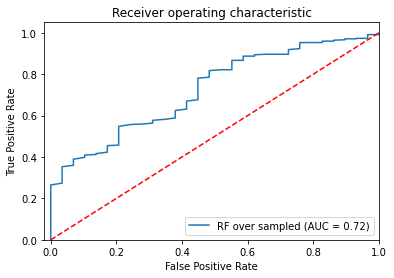

In [625]:
proba = pipe15.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [626]:
RFC_PCA_SM_TL =  roc_auc_rfo
pred_15 = pipe15.predict_proba(X_test)
# print(classification_report(y_test,pred_15))
new_pred = np.where(pred_15[:,1]>0.69,1,0)

In [627]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.10      0.59      0.17        29
         1.0       0.96      0.66      0.78       442

    accuracy                           0.65       471
   macro avg       0.53      0.62      0.48       471
weighted avg       0.91      0.65      0.74       471



# 3. Downsampling the majority class post applying TOMEK T Links

In [628]:
US = under_sampling.RandomUnderSampler()

In [629]:
X_TL_US,y_TL_US = US.fit_resample(X_TLsample, y_TLsample)

In [630]:
y_TL_US.value_counts()

1.0    75
0.0    75
Name: Pass/Fail, dtype: int64

#### 1. RFC

In [631]:
RFC_US_TL = RandomForestClassifier()
param_grid = {'n_estimators':[100,200,300,400,500,600,700,800]}
skf_US_TL = StratifiedKFold(n_splits=5)
GSCV_US_TL = GridSearchCV(estimator = RFC_US_TL,param_grid=param_grid,cv=skf_US_TL)
pipe16 = Pipeline([('scale',StandardScaler()),
                 ('pca',PCA(n_components=8)),
                 ('model',GSCV_US_TL)])

In [632]:
pipe16.fit(X_TL_US,y_TL_US)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=8)),
                ('model',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'n_estimators': [100, 200, 300, 400,
                                                           500, 600, 700,
                                                           800]}))])

In [633]:
pred_16 = pipe16.predict(X_test)
print(classification_report(y_test,pred_16))


              precision    recall  f1-score   support

         0.0       0.07      0.52      0.12        29
         1.0       0.95      0.55      0.70       442

    accuracy                           0.55       471
   macro avg       0.51      0.53      0.41       471
weighted avg       0.89      0.55      0.66       471



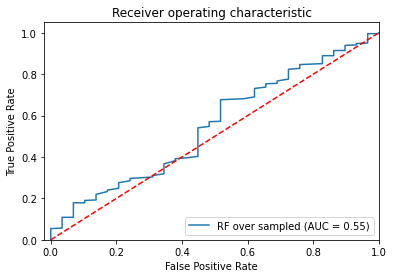

In [634]:
proba = pipe16.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [635]:
RFC_PCA_US_TL =  roc_auc_rfo
pred_15 = pipe16.predict_proba(X_test)
new_pred = np.where(pred_15[:,1]>0.50,1,0)

In [636]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.07      0.52      0.12        29
         1.0       0.95      0.55      0.70       442

    accuracy                           0.55       471
   macro avg       0.51      0.53      0.41       471
weighted avg       0.89      0.55      0.66       471



#### 2. Logistic Regression

In [637]:
LG_10 = LogisticRegression()
param_grid = {'n_jobs':[5]}
skf_TL_US = StratifiedKFold(n_splits=5)
GSCV_TL_US = GridSearchCV(estimator = LG_10,param_grid=param_grid,cv=skf_TL_US)
pipe17 = Pipeline([('scale',StandardScaler()),
                 ('pca',PCA(n_components=9)),
                 ('model',GSCV_TL_US)])

In [638]:
pipe17.fit(X_TL_US,y_TL_US)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=9)),
                ('model',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'n_jobs': [5]}))])

In [639]:
pred_17 = pipe17.predict(X_test)
print(classification_report(y_test,pred_17))


              precision    recall  f1-score   support

         0.0       0.09      0.59      0.15        29
         1.0       0.96      0.59      0.73       442

    accuracy                           0.59       471
   macro avg       0.52      0.59      0.44       471
weighted avg       0.90      0.59      0.69       471



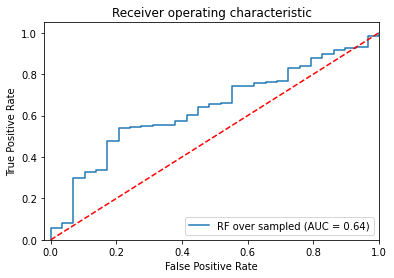

In [640]:
proba = pipe17.predict_proba(X_test)
pred_proba = proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF over sampled (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [641]:
Logit_PCA_US_TL =  roc_auc_rfo
pred_15 = pipe17.predict_proba(X_test)
new_pred = np.where(pred_15[:,1]>0.50,1,0)

In [642]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

         0.0       0.09      0.59      0.15        29
         1.0       0.96      0.59      0.73       442

    accuracy                           0.59       471
   macro avg       0.52      0.59      0.44       471
weighted avg       0.90      0.59      0.69       471



## Out of all models, we notice that pipe9 is the only best model that has a good F1 score of 29% for class 0 and 92% for class 1.

## Till now we have been splitting the existing data as train and test but in this case we  already have a seperate Test data in dataframe df imported from 'Future_predictions.xlsx'.

## Now we will work on creating a pipeline that shall take in the future prediction inputs do all the necessary steps and pass it on to the model that will be trained with the complete data from dataframe df_sig loaded from 'signal-data.csv'

In [655]:
list_model_performance = [Logit_nosampling,Logit_oversampling,Logit_SM_oversampling,DTC_nosampling,DTC_oversampling,DTC_SMOTE,RFC_nosampling,RFC_oversampling,RFC_SMOTE,Logit_PCA_oversampling,Logit_PCA_SMOTE,GuassianNB_PCA_oversampling,GuassianNB_PCA_SMOTE,DCT_PCA_OS,DCT_PCA_SM,RFC_PCA_OS,RFC_PCA_SM,Adaptive_PCA_OS,Adaptive_PCA_SM,gradient_PCA_OS,gradient_PCA_SM,RFC_PCA_SM_TL,RFC_PCA_US_TL,Logit_PCA_US_TL]
list_model_name = ['Logit_nosampling','Logit_oversampling','Logit_SM_oversampling','DTC_nosampling','DTC_oversampling','DTC_SMOTE','RFC_nosampling','RFC_oversampling','RFC_SMOTE','Logit_PCA_oversampling','Logit_PCA_SMOTE','GuassianNB_PCA_oversampling','GuassianNB_PCA_SMOTE','DCT_PCA_OS','DCT_PCA_SM','RFC_PCA_OS','RFC_PCA_SM','Adaptive_PCA_OS','Adaptive_PCA_SM','gradient_PCA_OS','gradient_PCA_SM','RFC_PCA_SM_TL','RFC_PCA_US_TL','Logit_PCA_US_TL']

In [671]:
model_performance = pd.DataFrame(list_model_name,columns=['Model_name'])
model_performance['ROC_Score'] = list_model_performance

In [670]:
model_performance.sort_values(by=['ROC_Score'],ascending=False)

,Model_name,ROC_Score
16,RFC_PCA_SM,0.740911
21,RFC_PCA_SM_TL,0.723748
6,RFC_nosampling,0.718482
20,gradient_PCA_SM,0.718287
8,RFC_SMOTE,0.705219
7,RFC_oversampling,0.702840
9,Logit_PCA_oversampling,0.689967
17,Adaptive_PCA_OS,0.664456
18,Adaptive_PCA_SM,0.660399
15,RFC_PCA_OS,0.658098


# ***We notice that RFC_PCA_SM model has the highest ROC score of 0.74 making it the best model we ever made. So, we will be taking this model for deployment***

# ***For a threshold of 0.38 the model gives 33% of F1score for class0(Minority class) and 96% of F1score for class 1.***


## Step1 - Takes in dataframe as input, removes columns where there are more than 100 NaN.

In [789]:
def step1(x):
    try:
        x['Pass/Fail'].replace({1:0,-1:1},inplace=True)
        Missing_values_percentage = []
        Missing_value_count = []
        for a,b in zip(x.isnull().sum(),x.columns):
            percentage = (a/x[b].count())
            if a > 100:
                x.drop(b,axis=1,inplace=True)
            else:
                pass 
    except:
        Missing_values_percentage = []
        Missing_value_count = []
        for a,b in zip(x.isnull().sum(),x.columns):
            percentage = (a/x[b].count())
            if a > 100:
                x.drop(b,axis=1,inplace=True)
            else:
                pass 
    return x

In [752]:
a = step1(df_sig1)

In [753]:
a

,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,1


# Step2 - Fills in missing values with median

In [764]:
def step2(x):
    knnimp = KNNImputer(n_neighbors=5)
    x = x.drop('Time',axis=1)
    b = knnimp.fit_transform(x)
    dd = pd.DataFrame(b,columns=x.columns)
    return dd

In [765]:
step2(a)

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.50050,0.01620,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.01942,0.01266,0.00438,65.5742,1.0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.49660,-0.00050,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.00960,0.02010,0.00600,208.2045,1.0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.44360,0.00410,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.05840,0.04840,0.01480,82.8602,0.0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.48820,-0.01240,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.02020,0.01490,0.00440,73.8432,1.0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.50310,-0.00310,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.02020,0.01490,0.00440,73.8432,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.34240,-0.00450,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.00680,0.01380,0.00470,203.1720,1.0
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.43330,-0.00610,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.00680,0.01380,0.00470,203.1720,1.0
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.47424,-0.00684,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.01970,0.00860,0.00250,43.5231,1.0
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.46220,-0.00720,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.02620,0.02450,0.00750,93.4941,1.0


# *Pickling the pipe9 model* - *To pickle the model with pipeline we use joblib*

In [782]:
# prod_model = pickle.dump(pipe9,open('pipe9.pkl','wb'))    

In [908]:
#Pickle model
import joblib
joblib.dump(pipe9, 'pipe9_prod.pkl')

#LoadModel
with open('pipe9_prod.pkl','rb')as model1:
    prod_model1 = joblib.load(model1)

In [913]:
prod_model1

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=8)),
                ('model',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'n_estimators': [100, 200, 300, 400,
                                                           500, 600, 700,
                                                           800]}))])

In [943]:
def step2(x):
    knnimp = KNNImputer(n_neighbors=5)
    x = x.drop('Time',axis=1)
    b = knnimp.fit_transform(x)
    dd = pd.DataFrame(b)
    return dd



#The function that will take inputs and produce the outputs in the form of dataframe
def prod_func(x):
    a = step1(x)
    b = step2(a)
    proba = prod_model1.predict_proba(b)
    new_pred = np.where(proba[:,1]>0.38,1,0)
    dd_ff = pd.DataFrame(new_pred)
    dd_ff['Proba'] = prod_model1.predict_proba(b)[:,1]
    return dd_ff
    
    

In [945]:
prod_func(df)
#Looks like all the inputs will get a pass in this case

,0,Proba
0,1,0.724
1,1,0.666
2,1,0.880
3,1,0.792
4,1,0.524
5,1,0.604
6,1,0.520
7,1,0.786
8,1,0.508
9,1,0.750


In [953]:
SM = over_sampling.SMOTE()
X_SM,y_SM = SM.fit_resample(X,y)
skcv = StratifiedKFold(n_splits=5)
accuracy = []

RFC_2 = RandomForestClassifier()
param_grid = {'n_estimators':[100,200,300,400,500,600,700,800]}
GSCV9 = GridSearchCV(estimator = RFC_2,param_grid=param_grid)
pipe9_9 = Pipeline([('scale',StandardScaler()),
                 ('pca',PCA(n_components=8)),
                 ('model',GSCV9)])

# X is the feature set and y is the target
for train_index, test_index in skcv.split(X_SM, y_SM): 
    X1_train, X1_test = X_SM.iloc[train_index], X_SM.iloc[test_index] 
    y1_train, y1_test = y_SM.iloc[train_index], y_SM.iloc[test_index]
    pipe9_9.fit(X1_train,y1_train)
    pred = pipe9_9.predict(X1_test)
    print(classification_report(y1_test,pred))
    print(confusion_matrix(y1_test,pred))
    score=accuracy_score(pred,y1_test)
    accuracy.append(score)   
print(accuracy)

              precision    recall  f1-score   support

         0.0       0.61      0.94      0.74       293
         1.0       0.88      0.41      0.55       293

    accuracy                           0.67       586
   macro avg       0.74      0.67      0.65       586
weighted avg       0.74      0.67      0.65       586

[[276  17]
 [174 119]]
              precision    recall  f1-score   support

         0.0       0.70      0.91      0.79       292
         1.0       0.87      0.61      0.72       293

    accuracy                           0.76       585
   macro avg       0.78      0.76      0.75       585
weighted avg       0.78      0.76      0.75       585

[[265  27]
 [114 179]]
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       292
         1.0       0.94      0.84      0.89       293

    accuracy                           0.89       585
   macro avg       0.90      0.89      0.89       585
weighted avg       0.90     

In [956]:
np.mean(accuracy)

0.7990857909629241

In [957]:
np.std(accuracy)

0.07616123097594038

In [962]:
79.90+ (2*7.61)

95.12

In [963]:
79.90-(2*7.61)

64.68

## We are 95% confident that the models accuracy score will be between 65% to 95%

# Conclusion and improvisation:

#### 1. The idea is to identify both True Positives and True Negatives to the maximum level. In this case lets take an example that we are manufacturing a Resistor.

#### 2. If a process Fails and if we incorrectly identify it as a Pass then it would create a big issue. Since we identified the process as pass, we send the inputs to the machine to manufacture resistor and the ouptut will be either a bad resistor or a resistor with different resistance. For eg: If we would like to manufacture a 10Ohms resistor and while checking the machine if we get a pass, we proceed on to make resistors in bulk and finally when ouput comes we identify that the resistor produced was 5Ohms and not 10Ohms.

#### 3. Our main motto is to not let this happen, so we will focus on improving our recall score. We can accept few incorrect predictions of fail for the actual Pass. This is actually, the model is actually a Pass but we predict it as Fail. Now, this will be passed on to further tests where it will be noticed that it is actually pass.

#### 4. Now, if we only focus on recall and improve the score then precision would go down. This leads to identifying more of Actual Pass as Fails which is also an issue if it happens frequently. So, the ideal metric to look into is F1 score which will aim on reducing both False Negative an False Positives.

#### 5. In this case we notice 93.36% (1463) of class 1 and only 6.63% (104) of class 0. An Oversampling or SMOTE or Downsampling will not help here. Downsampling leads to a loss of data which leads to reduction in variance of class 1 and oversampling leads to creating a duplicate or SMOTE synthetic oversampling data. This data will not be a normal distribution data and if a data is not normally distributed we will not be able to analyze and come to a conclusion.  The suggestion will be to get more of class 0 data input from the domain expertise.

#### 6. The more we have class 0 data the more it is better to apply oversampling or SMOTE technique to fill in the imbalance issue. For eg: if we have 1463 of class 1 and atleast 500 class 0 then it is easy to apply oversampling or SMOTE technique to build a good model to predict both classes.

#### 7. The model that best performed was Random Forest Classifier, the inputs were scaled, reduced in dimensionality to 8 features. The inputs used for training were SMOTE balanced.
